<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Ethan Wang<br>
<b>NetID</b>: ew337<br>
<b>Notes to Grader</b> (optional): For 4.4, I normalized the testing data to get a reasonable error for both methods. This was to avoid getting errors greater than 10,000.<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: EW    


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

# Lab 5: Multivariate Linear Regression

### Due Date: Thursday April 21, 2020 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on new data


## Initialize

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains housing data. 

# Task 1 - Initialization
Read the file into a dataframe and keep only some features. We will be doing univariate and multivariate regression on housing data.The goal is to find a model that will allow us to predict hosuing prices given certain values.

### Activity 1.1  Read Data

In [ ]:
import pandas as pd
df=pd.read_csv('data/USA_Housing.csv', sep=',')
df
df_adjusted = df.filter(['Avg. Area House Age', 'Avg. Area Number of Rooms', 'Price'])
df_adjusted# keep only the columns "Avg. Area House Age" and "Avg. Area Number of Rooms" and Price

In [ ]:
## Split the data into training (90%) and testing (10%)
df_training = df_adjusted.iloc[:4500]
df_training
df_testing =  df_adjusted.iloc[-500:]
df_training# we will be using test data later in this assignment

### Activity 1.2 Normalize Data
In this task, you need to normalize df_training data using MinMaxScaler from sklearn.preprocessing. Normalize all df_training data columns to be between 0 and 1. X_scaled_values are the normalized x values of housing data and Y_scaled_values are the scaled values of prices. We saved the final values in x and y, here x[0] must be average house age scaled values and x[1] must be average area number of rooms. 

In [ ]:
# BEGIN SOLUTION
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled_values = pd.DataFrame()

scaler.fit(df_training)

scalerdf = pd.DataFrame(scaler.transform(df_training))

#X_scaled_values[0] = ((df_training['Avg. Area House Age'] - min(df_training['Avg. Area House Age'])) / 
 #(max(df_training['Avg. Area House Age']) - min(df_training['Avg. Area House Age'])))
#X_scaled_values[1] = ((df_training['Avg. Area Number of Rooms'] - min(df_training['Avg. Area Number of Rooms'])) / 
                   #(max(df_training['Avg. Area Number of Rooms']) - min(df_training['Avg. Area Number of Rooms'])))

Y_scaled_values = ((df_training['Price'] - min(df_training['Price'])) / 
                   (max(df_training['Price']) - min(df_training['Price'])))

Y_scaled_values

X_scaled_values[0] = scalerdf[0]
X_scaled_values[1] = scalerdf[1]
Y_scaled_values = scalerdf[2]
# END SOLUTION


# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values

### Activity 1.3 Plot the feature data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a linear regression model. In this activity, we will plot the points to see if a line fit to data is reasonable. Plot housing prices vs "Avg. Area House Age" and "Avg. Area Number of Rooms"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area House Age" and y = price
### BEGIN SOLUTION

plt.plot(x[0], y, 'o');
### END SOLUTION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area Number of Rooms" and y = price
### BEGIN SOLUTION

plt.plot(x[1], y, 'o');
### END SOLUTION

## Question 1.4
##### BEGIN ANSWER
question: Based on what you see in the plot, do you think it is fine to use linear regression to predict housing prices? Why?

I think it is fine to use linear regression, as there are a ton of observations in the previous two graphs that can be used to give an accurate estimation of housing prices.
##### END ANSWER

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line for the model x = "Avg. Area House Age" and y = price. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error 
$$
 E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [ ]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
    return theta0 + theta1*x

### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [ ]:
import numpy as np

## BEGIN SOLUTION
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: L2 square error
    Assumptions: none
    """
    return np.sum((h(theta0, theta1, x) - y)**2)
    
## END SOLUTION

## testing
print(sqerror(x[0], y, 0.29,0.52))
print(sqerror(x[1], y, 0.29,0.52))

### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [ ]:
import numpy as np
import math

## BEGIN SOLUTION
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error
    Assumptions: none
    """
    return np.sum(abs(h(theta0, theta1, x) - y))

## END SOLUTION

## testing
abserror(x[0], y, 0.29,0.52)

### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
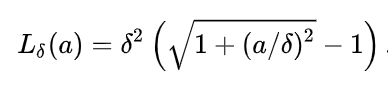
The following function finds the average huber error. In this equation, a  = |h(theta) - y| (see notes for details)

In [ ]:
import numpy as np
import math

## BEGIN SOLUTION
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    return np.sum((delta**2)*(np.sqrt(1+(abs(h(theta0, theta1, x) - y)/delta)**2) - 1))

## END SOLUTION

## testing
huberror(x[0], y, 0.29,0.52,0.1)

### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [ ]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y1 = h(theta0, theta1, x[0]) 
    # compose plot
    pylab.plot(x[0],y1) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x[0], y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x[0], y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x[0], y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = x[0]   
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [ ]:


# BEST VALUES FOR AVE SQUARE ERROR
theta0 = .3
theta1 = .4
error = 75.336923
# BEST VALUES FOR AVE ABS ERROR
theta0 = .3
theta1 = .4
error = 465.1742

# BEST VALUES FOR AVE HUBER ERROR
theta0 = .3
theta1 = .4
error = 4.2549

# Task 3 - Gradient Descent - Univariate
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$

The alpha is called the "learning rate". $(x^j, y^j)$ is the j-th observation. It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute Parameters using the Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [ ]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN SOLUTION  
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """           
    prev_theta0, prev_theta1 = 0.3, 0.4
    oldError = sqerror(obsX, obsY, prev_theta0, prev_theta1)
    newError = oldError + 100
    iterations = 0

    while abs(newError - oldError) >= threshold:
        theta0 = prev_theta0 - alpha*sum(prev_theta1*obsX + prev_theta0 - obsY)
        theta1 = prev_theta1 - alpha*sum((prev_theta1*obsX + prev_theta0 - obsY)*obsX)

        newError = sqerror(obsX, obsY, theta0, theta1)
        oldError = sqerror(obsX, obsY, prev_theta0, prev_theta1)
        
        prev_theta0 = theta0
        prev_theta1 = theta1
    
        iterations += 1
        
        print(f'iter_num = {iterations}, theta0 = {theta0}, theta1 = {theta1}, newError = {newError}')
        
    return theta0, theta1, newError, iterations
    
# END SOLUTION

[theta0,theta1,newError,iterations] = gd2(x[0],y,0.0001,0.0001)
print(iterations, newError)

In [ ]:
# observe theta0 and theta1
theta0, theta1

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [ ]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN SOLUTION

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    prev_theta0, prev_theta1 = 0.3, 0.4
    oldError = huberror(obsX, obsY, prev_theta0, prev_theta1, delta)
    newError = oldError + 100
    iterations = 0        

    while abs(newError - oldError) >= threshold:
        A = h(prev_theta0, prev_theta1, obsX) - obsY
        
        theta0 = prev_theta0 - alpha*sum((delta*A)/(np.sqrt(delta**2 + A**2)))
        theta1 = prev_theta1 - alpha*sum((delta*A*obsX)/(np.sqrt(delta**2 + A**2)))

        newError = huberror(obsX, obsY, theta0, theta1, delta)
        oldError = huberror(obsX, obsY, prev_theta0, prev_theta1, delta)
        
        prev_theta0 = theta0
        prev_theta1 = theta1
    
        iterations += 1
        
        print(f'iter_num = {iterations}, theta0 = {theta0}, theta1 = {theta1}, newError = {newError}')
        
    return theta0, theta1, newError, iterations
    
 
## END SOLUTION
# testing    
[theta0,theta1,newError,iterations] = gdh(x[0],y,0.0001,0.000001,0.01)
print(iterations, newError)

In [ ]:
theta0, theta1

### Activity 3.2
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent
2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.

##### BEGIN ANSWER
theta0 = 0.2872957748253073

theta1 = 0.4317105783212077

alpha = .0001

error = 4.247416405526566

##### END ANSWER

### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(np.reshape(list(x[0]), (-1, 1)),y)
print(result.intercept_)
print(result.coef_)

In [ ]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(x[0], y, theta0,theta1)

# Task 4 - Extending the Model to a Bivariate
In this task we extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.1
We need to estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). Using the same formating write the formulas for $\theta_1$ and $\theta_2$. The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. 
Refer to class lectures for more help. 

$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$



/* write equations for $\theta_1$ and $\theta_2$ here */

$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)*x_1^j
$$

$$
\theta_2 = \theta_2 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)*x_2^j
$$

## Activity 4.2 Compute Parameters using the Gradient Descent algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration in your function. You may get different outputs depends on your initial choice of $\theta_0$, $\theta_1$ and $\theta_2$ values. We will accept any answers which are close to the sample output.

In [ ]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN SOLUTION  
def gd22(obsX1, obsX2, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    prev_theta0, prev_theta1, prev_theta2 = 0, 0, 0
    oldError = np.sum((prev_theta2*obsX2 + h(prev_theta0, prev_theta1, obsX1) - y)**2)
    newError = oldError + 100
    iterations = 0

    while abs(newError - oldError) >= threshold:
        theta0 = prev_theta0 - alpha*sum(prev_theta2*obsX2 + prev_theta1*obsX1 + prev_theta0 - obsY)
        theta1 = prev_theta1 - alpha*sum((prev_theta2*obsX2 + prev_theta1*obsX1 + prev_theta0 - obsY)*obsX1)
        theta2 = prev_theta2 - alpha*sum((prev_theta2*obsX2 + prev_theta1*obsX1 + prev_theta0 - obsY)*obsX2)

        newError = np.sum((theta2*obsX2 + h(theta0, theta1, obsX1) - y)**2)
        oldError = np.sum((prev_theta2*obsX2 + h(prev_theta0, prev_theta1, obsX1) - y)**2)
        
        prev_theta0 = theta0
        prev_theta1 = theta1
        prev_theta2 = theta2
    
        iterations += 1
        
        print(f'iter_num = {iterations}, theta0 = {theta0}, theta1 = {theta1}, theta2 = {theta2}, newError = {newError}')
        
    return theta0, theta1, theta2, newError, iterations
    
    
    
# END SOLUTION

[theta0,theta1,theta2, newError,iterations] = gd22(x[0], x[1], y,0.0001,0.0001)
print(iterations, newError)

Write the values of thetas obtained from function above.
$$\theta_0 = 0.10083927452180415$$ 
$$\theta_1 = 0.4449972412888299$$ 
$$\theta_2 = 0.3607563825104837$$ 
and write the model 
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.3 Compare Coefficients with Library Estimators
Now use the sklearn LinearRegression module to automate the process of finding coefficients. 

In [ ]:
# fit a regression model
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# assume
#y = df_training.Price
#X = df_training[["Avg. Area House Age","Avg. Area Number of Rooms"]]

model = LinearRegression().fit(x, y)
model
print(model.coef_)
model.intercept_

What coefficients do you get? Are they close to what you received from gradient descent? ]Is that error smaller or bigger than the squared error you received?

##### Begin Answer
theta0 = 0.09387220870514473, theta1 = 0.45079814, theta2 = 0.36890276

The library estimator coefficients are very close to the gradient descent's.

The squared error is bigger than the gradient descent error.

##### End Answer

## Activity 4.4.1 - Predict the Housing Price using test set data - gradient descent
Use the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [ ]:
## Begin Solution
scaler.fit(df_testing)

scalertestdf = pd.DataFrame(scaler.transform(df_testing))

predicted_grad = scalertestdf[1]*theta2 + scalertestdf[0]*theta1 + theta0

## End solution
error_gs = np.sum(abs(predicted_grad - scalertestdf[2]))/len(df_testing)
error_gs

## Activity 4.4.2 - Predict the Housing Price using test set data - library estimator
Use the test set to find the estimated value of the home $y$ using coefficients received from library estimators. Defined the averge error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [ ]:
## Begin Solution
predicted_lib = scalertestdf[1]*model.coef_[1] + scalertestdf[0]*model.coef_[0] + model.intercept_
## End solution
error_lib = np.sum(abs(predicted_lib - scalertestdf[2]))/len(df_testing)
error_lib

## Activity 4.4.3
Compare the performance of Gradient Descent and Library Estimators. Briefly explain your observations and if there are significant descrepancies, explain them in your words. Do you think either model would be a reasonable model for predicting home prices for new homes on the market? Why or Why not.

### begin answer
Based off the error I got from both the library estimators and gradient descent, I think that there's not much difference in performance between the two. The two errors were only different by a .0002 margin, and there weren't any significant discrepancies I could find in my calculations. I think both models are perfectly fine with predicting house prices, as the errors for both models are relatively small, and both models give good estimations of the normalized data.
### end answer

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-lowest, 10-highest) : 5
* how can we improve his lab? : There were a bunch of typos and incorrect code statements in this lab. The expect output was very inconsistent with the overall results, and the directions for some of the activities were confusing. Perhaps you could improve the lab so that the results for everyone stays consistent and the directions are clear and thorough.

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_lab6.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; lab5 <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

@2022 All Rights Reserved. Lab Developed by A.D. Gunawardena for CS 439. DO NOT post a copy of this lab or solutions in public space such as github or on commercial sites. 